In [17]:
import cv2
import os
import numpy as np
import io
import scipy.ndimage as ndimage
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.image as implt
from matplotlib.pyplot import imshow
import matplotlib.colors as colshow
import colorsys

from skimage import data
from skimage import filters
from skimage import exposure

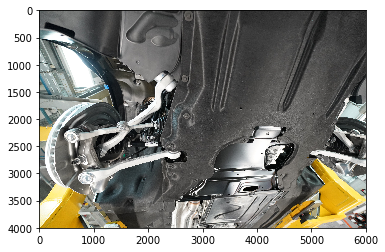

In [45]:
#img = Image.open("DSC00095.JPG")
img = implt.imread('DSC00095.JPG')
plt.imshow(img)
plt.show()

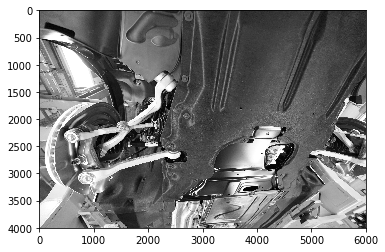

In [47]:
gray1 = rgb2gray(img)
plt.imshow(gray1, cmap="gray")
plt.show()

convert rgb image to hsv scale

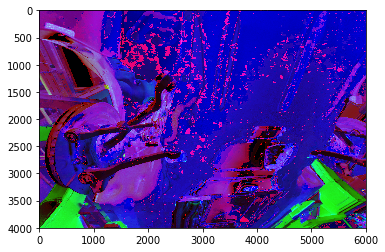

In [50]:
img2 = colshow.rgb_to_hsv(img)
plt.imshow(img2)
plt.show()

Onyl use 'S' channel for further processing

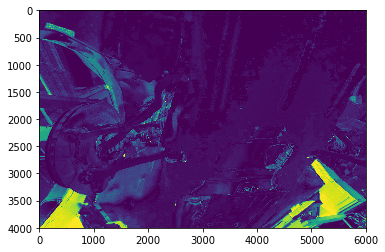

In [14]:
s_image = img2[:,:,1]
plt.imshow(s_image)
plt.show()

try same as above but use v-value

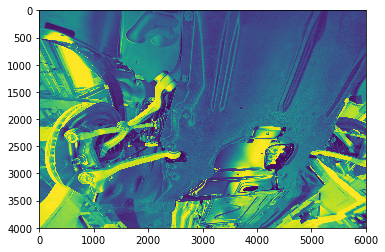

In [33]:
v_image = img2[:,:,2]
plt.imshow(v_image)
plt.show()

##try trehsholding on grayscale image

In [55]:
#print(v_image)
#plt.imshow(v_image, cmap='gray') #, cmap = plt.get_cmap('gray'))
#plt.show()
print(v_image.max())
print(v_image.min())

255.0
0.0


In [37]:
def rgb2gray(rgb):
    return np.dot(rgb[...,:3], [0.299, 0.587, 0.114])

Soften image via Gaussian filter

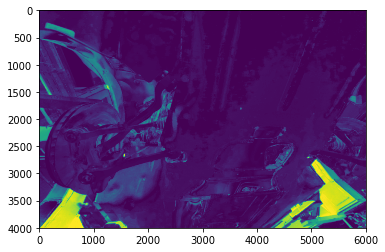

1.0
0.0
255.0
0.0


In [57]:
img_gaussian = ndimage.gaussian_filter(s_image, sigma=(5), order=0)
plt.imshow(img_gaussian)
plt.show()

print(img_gaussian.max())
print(img_gaussian.min())
scaled = img_gaussian*255
print(scaled.max())
print(scaled.min())

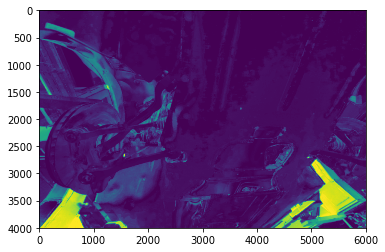

In [58]:
plt.imshow(scaled)
plt.show()

102.099609375


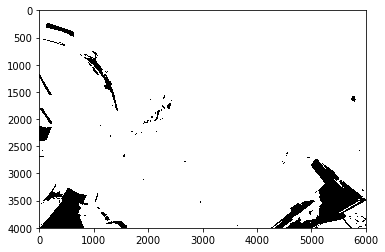

In [69]:
val = filters.threshold_otsu(scaled)
hist, bins_center = exposure.histogram(scaled)

print(val)
#val= 20

plt.imshow(scaled < val, cmap='gray', interpolation='nearest')
plt.show()


<function threshold_minimum at 0x000001DA973A6730>


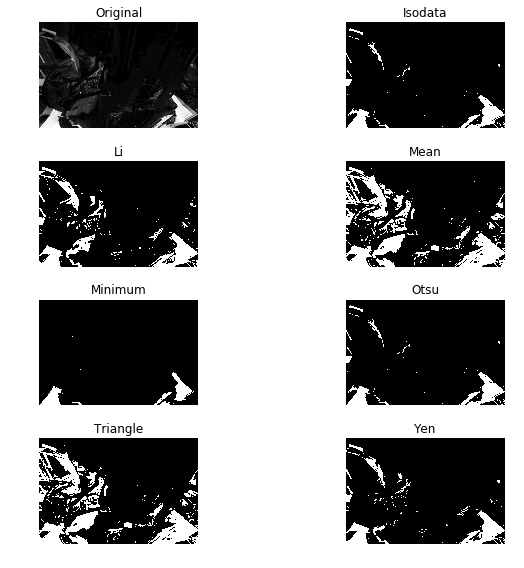

In [32]:
fig, ax = filters.try_all_threshold(img_gaussian, figsize=(10, 8), verbose=False)
plt.show()